In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
csv = pd.read_csv('./datasets/USvideos.csv')

In [14]:
csv

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,count_word
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",10
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,5
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,6
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,5
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,14
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,6


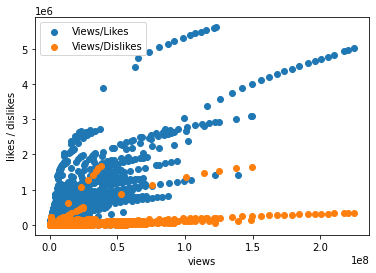

In [15]:
plt.scatter(csv.views, csv.likes)
plt.scatter(csv.views, csv.dislikes)
plt.xlabel('views')
plt.ylabel('likes / dislikes')
plt.legend(['Views/Likes', 'Views/Dislikes'])
# plt.plot(csv.likes, csv.dislikes)
plt.show()

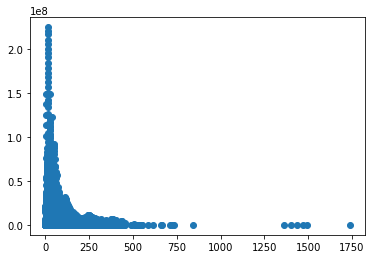

In [16]:
plt.plot((csv.likes/csv.dislikes), csv.views, 'o')
plt.show()

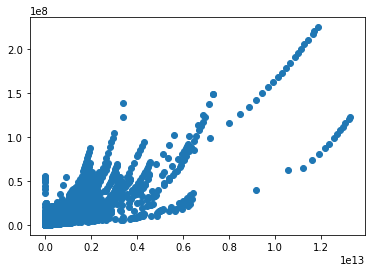

In [17]:
plt.plot((csv.likes * csv.views.mean()), csv.views, 'o')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


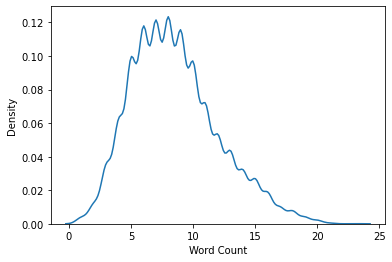

In [18]:
csv['count_word']=csv["title"].apply(lambda x: len(str(x).split()))
sns.distplot(csv['count_word'], hist=False)
plt.xlabel('Word Count')
plt.show()

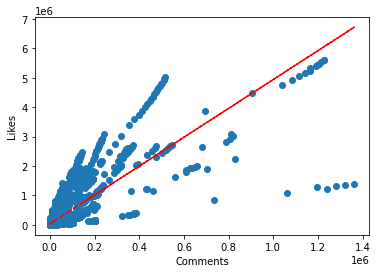

In [19]:
plt.scatter(csv.comment_count, csv.likes)
plt.xlabel('Comments')
plt.ylabel('Likes')
trend = np.polyfit(csv.comment_count, csv.likes, 1)
trendline = np.poly1d(trend)
plt.plot(csv.comment_count,trendline(csv.comment_count),"r--")

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.YTick at 0x25ac67943d0>,
 [Text(0, 0, '0'),
  Text(0, 1000000, '1'),
  Text(0, 2000000, '2'),
  Text(0, 3000000, '3'),
  Text(0, 4000000, '4'),
  Text(0, 5000000, '5'),
  Text(0, 6000000, '6'),
  Text(0, 7000000, '7')])

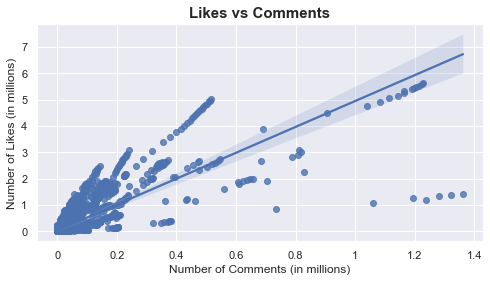

In [64]:
x = csv.comment_count
y = csv.likes
sns.set(rc={"figure.figsize":(8, 4)})
plot = sns.regplot(x, y, data=csv)
plot.set_xlabel('Number of Comments (in millions)', fontsize=12)
plot.set_ylabel('Number of Likes (in millions)', fontsize=12)
plot.set_title('Likes vs Comments', fontsize=15, weight=600)
plt.xticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000],[0, .2, .4, .6, .8, 1, 1.2, 1.4])
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000],[0, 1, 2, 3, 4, 5, 6, 7])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


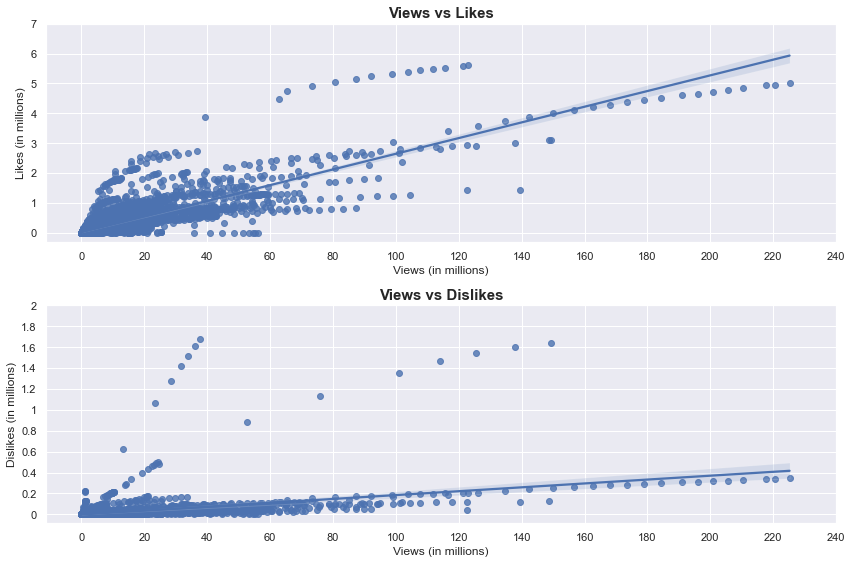

In [70]:
x = csv.views
y = csv.likes
z = csv.dislikes
a = plt.subplot(2,1,1)
sns.set(rc={"figure.figsize":(20, 8)})
plot = sns.regplot(x, y, data=csv)
plot.set_xlabel('Views (in millions)', fontsize=12)
plot.set_ylabel('Likes (in millions)', fontsize=12)
plot.set_title('Views vs Likes', fontsize=15, weight=600)
plt.xticks([0, 20000000, 40000000, 60000000, 80000000, 100000000, 120000000, 140000000, 160000000, 180000000, 200000000, 220000000, 240000000],[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240])
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000],[0, 1, 2, 3, 4, 5, 6, 7])

b = plt.subplot(2,1,2)
plot = sns.regplot(x, z, data=csv)
plot.set_xlabel('Views (in millions)', fontsize=12)
plot.set_ylabel('Dislikes (in millions)', fontsize=12)
plot.set_title('Views vs Dislikes', fontsize=15, weight=600)
plt.xticks([0, 20000000, 40000000, 60000000, 80000000, 100000000, 120000000, 140000000, 160000000, 180000000, 200000000, 220000000, 240000000],[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240])
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000, 1800000, 2000000],[0, .2, .4, .6 , .8, 1, 1.2, 1.4, 1.6, 1.8, 2])
plt.tight_layout()

In [106]:
csv['cat_name'] = np.nan
csv.loc[(csv["category_id"] == 1),"cat_name"] = 'Film and Animation'
csv.loc[(csv["category_id"] == 2),"cat_name"] = 'Cars and Vehicles'
csv.loc[(csv["category_id"] == 10),"cat_name"] = 'Music'
csv.loc[(csv["category_id"] == 15),"cat_name"] = 'Pets and Animals'
csv.loc[(csv["category_id"] == 17),"cat_name"] = 'Sport'
csv.loc[(csv["category_id"] == 19),"cat_name"] = 'Travel and Events'
csv.loc[(csv["category_id"] == 20),"cat_name"] = 'Gaming'
csv.loc[(csv["category_id"] == 22),"cat_name"] = 'People and Blogs'
csv.loc[(csv["category_id"] == 23),"cat_name"] = 'Comedy'
csv.loc[(csv["category_id"] == 24),"cat_name"] = 'Entertainment'
csv.loc[(csv["category_id"] == 25),"cat_name"] = 'News and Politics'
csv.loc[(csv["category_id"] == 26),"cat_name"] = 'How to and Style'
csv.loc[(csv["category_id"] == 27),"cat_name"] = 'Education'
csv.loc[(csv["category_id"] == 28),"cat_name"] = 'Science and Technology'
csv.loc[(csv["category_id"] == 29),"cat_name"] = 'Non Profits and Activism'
csv.loc[(csv["category_id"] == 25),"cat_name"] = 'News & Politics'

In [31]:
csv

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,count_word,category_name,cat_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,NaN,People and Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",10,NaN,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10,NaN,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,5,NaN,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,5,NaN,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,6,NaN,Pets and Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,5,NaN,People and Blogs
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,14,NaN,Entertainment
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,6,NaN,Film and Animation


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


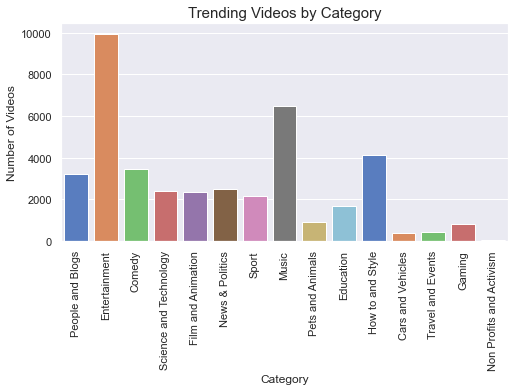

In [125]:
cat = sns.countplot('cat_name', data=csv, palette="muted")
cat.set_xticklabels(cat.get_xticklabels(),rotation=45)
cat.set_title("Trending Videos by Category", fontsize=15)
cat.set_xlabel("Category", fontsize=12)
cat.set_ylabel("Number of Videos", fontsize=12)
cat.set_xticklabels(cat.get_xticklabels(),rotation = 90)
sns.set(rc={"figure.figsize":(8, 4)})

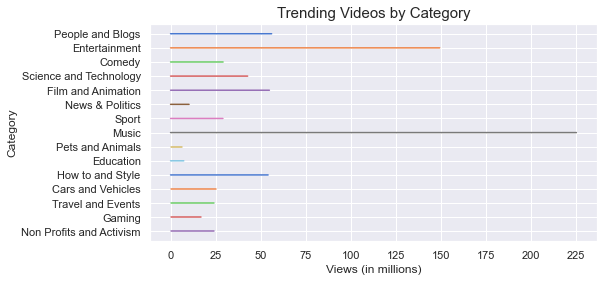

In [130]:
cat = sns.lineplot(x = csv['views'], y = csv['cat_name'], data=csv, palette="muted", hue="cat_name")
cat.set_title("Trending Videos by Category", fontsize=15)
cat.set_xlabel("Views (in millions)", fontsize=12)
cat.set_ylabel("Category", fontsize=12)
plt.xticks([0, 25000000, 50000000, 75000000, 100000000, 125000000, 150000000, 175000000, 200000000, 225000000],[0, 25, 50, 75, 100, 125, 150, 175, 200, 225])
plt.legend([],[], frameon=False)
sns.set(rc={"figure.figsize":(8, 4)})

C:\Users\mach1\AppData\Local\Temp/ipykernel_16964/441246945.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)


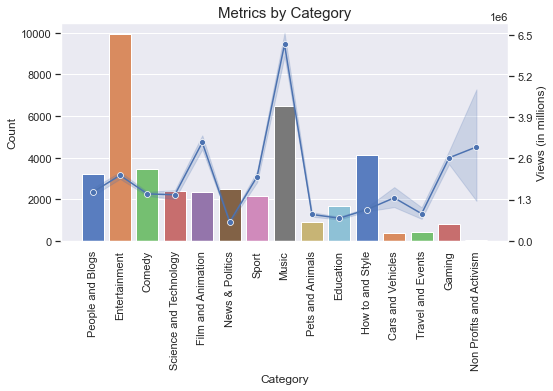

In [235]:
x = csv.cat_name
y = csv.views

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.set_title("Metrics by Category", fontsize=15)

sns.countplot(x = x, data=csv, ax = ax1, palette="muted")
sns.lineplot(x = x, y = y, ax = ax2, marker='o', palette="muted", data=csv)

ax1.set_ylabel('Count')
ax2.set_ylabel('Views (in millions)')

ax1.set_xlabel("Category", fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
ax2.yaxis.set_ticks([0, 1300000, 2600000, 3900000, 5200000, 6500000])

ax2.grid(None)


plt.show()

In [71]:
from textblob import TextBlob

In [83]:
csv['polarity'] = np.nan
csv['subjectivity'] = np.nan
for i in csv.title:
    blob = TextBlob(i)
    csv.loc[(csv["title"] == i), "polarity"] = blob.sentiment.polarity
    csv.loc[(csv["title"] == i), "subjectivity"] = blob.sentiment.subjectivity
csv

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,polarity,subjectivity
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0.000000,0.000000
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0.000000,0.066667
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.000000,0.000000
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,-0.750000,1.000000
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,0.000000,0.000000
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,0.350000,0.650000
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,1.000000,1.000000
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,-0.166667,0.433333


In [84]:
csv

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,polarity,subjectivity
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0.000000,0.000000
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0.000000,0.066667
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,0.000000,0.000000
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,-0.750000,1.000000
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,0.000000,0.000000
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,0.350000,0.650000
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,1.000000,1.000000
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,-0.166667,0.433333


<AxesSubplot:xlabel='polarity', ylabel='subjectivity'>

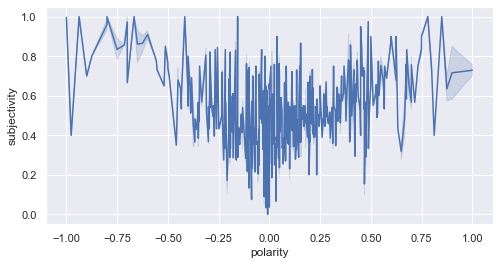

In [239]:
sns.lineplot(x = csv['polarity'], y = csv['subjectivity'], data=csv, palette="muted")

(150.0, 210.0)

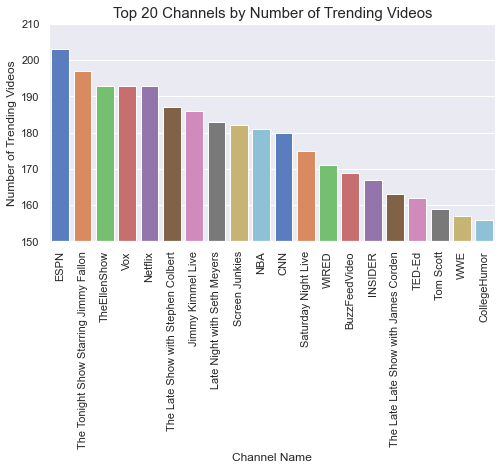

In [271]:
a = csv.channel_title.value_counts().index.tolist()
b = csv.channel_title.value_counts()

f = sns.barplot(x=a[0:20], y=b[0:20], data=csv, palette="muted")
f.set_xticklabels(f.get_xticklabels(),rotation = 90)
f.set_title("Top 20 Channels by Number of Trending Videos", fontsize=15)
f.set_xlabel("Channel Name", fontsize=12)
f.set_ylabel("Number of Trending Videos", fontsize=12)
# f.yaxis.set_ticks([150, 160, 170, 180, 190, 200, 210])
plt.ylim([150,210])


In [278]:
csv['ratio'] = csv['likes']/csv['dislikes']
csv

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,polarity,subjectivity,cat_name,ratio
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,19.395482,0.000000,People and Blogs,19.395482
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",15.812724,0.066667,Entertainment,15.812724
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,27.352126,0.000000,Comedy,27.352126
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,15.273273,1.000000,Entertainment,15.273273
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,66.483157,0.000000,Entertainment,66.483157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,27.552347,0.000000,Pets and Animals,27.552347
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,157.089005,0.650000,People and Blogs,157.089005
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,46.577519,1.000000,Entertainment,46.577519
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,67.799368,0.433333,Film and Animation,67.799368


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 't')

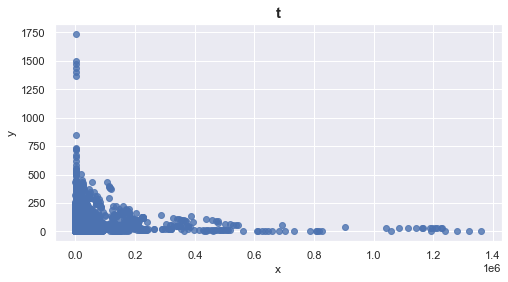

In [297]:
x = csv.comment_count
y = csv.ratio
sns.set(rc={"figure.figsize":(8, 4)})
plot = sns.regplot(x, y, data=csv)
plot.set_xlabel('x', fontsize=12)
plot.set_ylabel('y', fontsize=12)
plot.set_title('t', fontsize=15, weight=600)
# plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000],[0, 1, 2, 3, 4, 5, 6, 7])

C:\Users\mach1\AppData\Local\Temp/ipykernel_16964/384778472.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  cat.set_xticklabels(cat.get_xticklabels(),rotation=45)
C:\Users\mach1\AppData\Local\Temp/ipykernel_16964/384778472.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  cat.set_xticklabels(cat.get_xticklabels(),rotation = 90)


(0.0, 200.0)

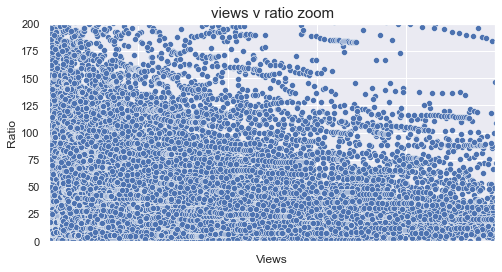

In [336]:
cat = sns.scatterplot(x='views', y='ratio', data=csv)
cat.set_xticklabels(cat.get_xticklabels(),rotation=45)
cat.set_title("views v ratio zoom", fontsize=15)
cat.set_xlabel("Views", fontsize=12)
cat.set_ylabel("Ratio", fontsize=12)
cat.set_xticklabels(cat.get_xticklabels(),rotation = 90)
sns.set(rc={"figure.figsize":(8, 4)})
plt.xlim(0,5000000)
plt.ylim(0,200)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='views', ylabel='dislikes'>

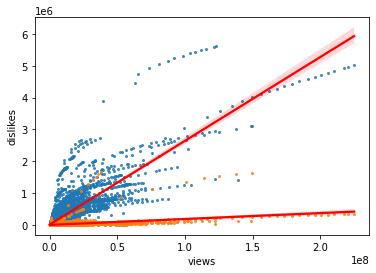

In [7]:
sns.regplot(csv.views, csv.likes, data=csv, scatter_kws={'s':4}, line_kws={"color": "blue"})
sns.regplot(csv.views, csv.dislikes, data=csv, scatter_kws={'s':4}, line_kws={"color": "red"})